In [11]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/Chimp/mapDf.RData")
dir <- "environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis"
load(file.path(dir, "treeCons.RData"))
load(file.path(dir, "treeCons0.RData"))
load(file.path(dir, "treeCor.RData"))
load(file.path(dir, "treeMeanInf0.RData"))
load(file.path(dir, "treeThr.RData"))
load(file.path(dir, "yAggConsNS.RData"))
load(file.path(dir, "yAggConsNS0.RData"))
load(file.path(dir, "yAggCorNS.RData"))
load(file.path(dir, "yAggMeanInfNS0.RData"))
load(file.path(dir, "yAggThrNS.RData"))
save_dir <- "environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis"

### Plotting mean Infrv

In [3]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- data.frame(infRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus")

In [4]:
### Consensus0
depth <- node.depth(treeCons0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus0"))

In [5]:
### Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Anti-Correlation"))

In [6]:
### Mean Inf 0 threshold
depth <- node.depth(treeMeanInf0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf0"))

In [7]:
### Threshold
depth <- node.depth(treeThr,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Thr"))

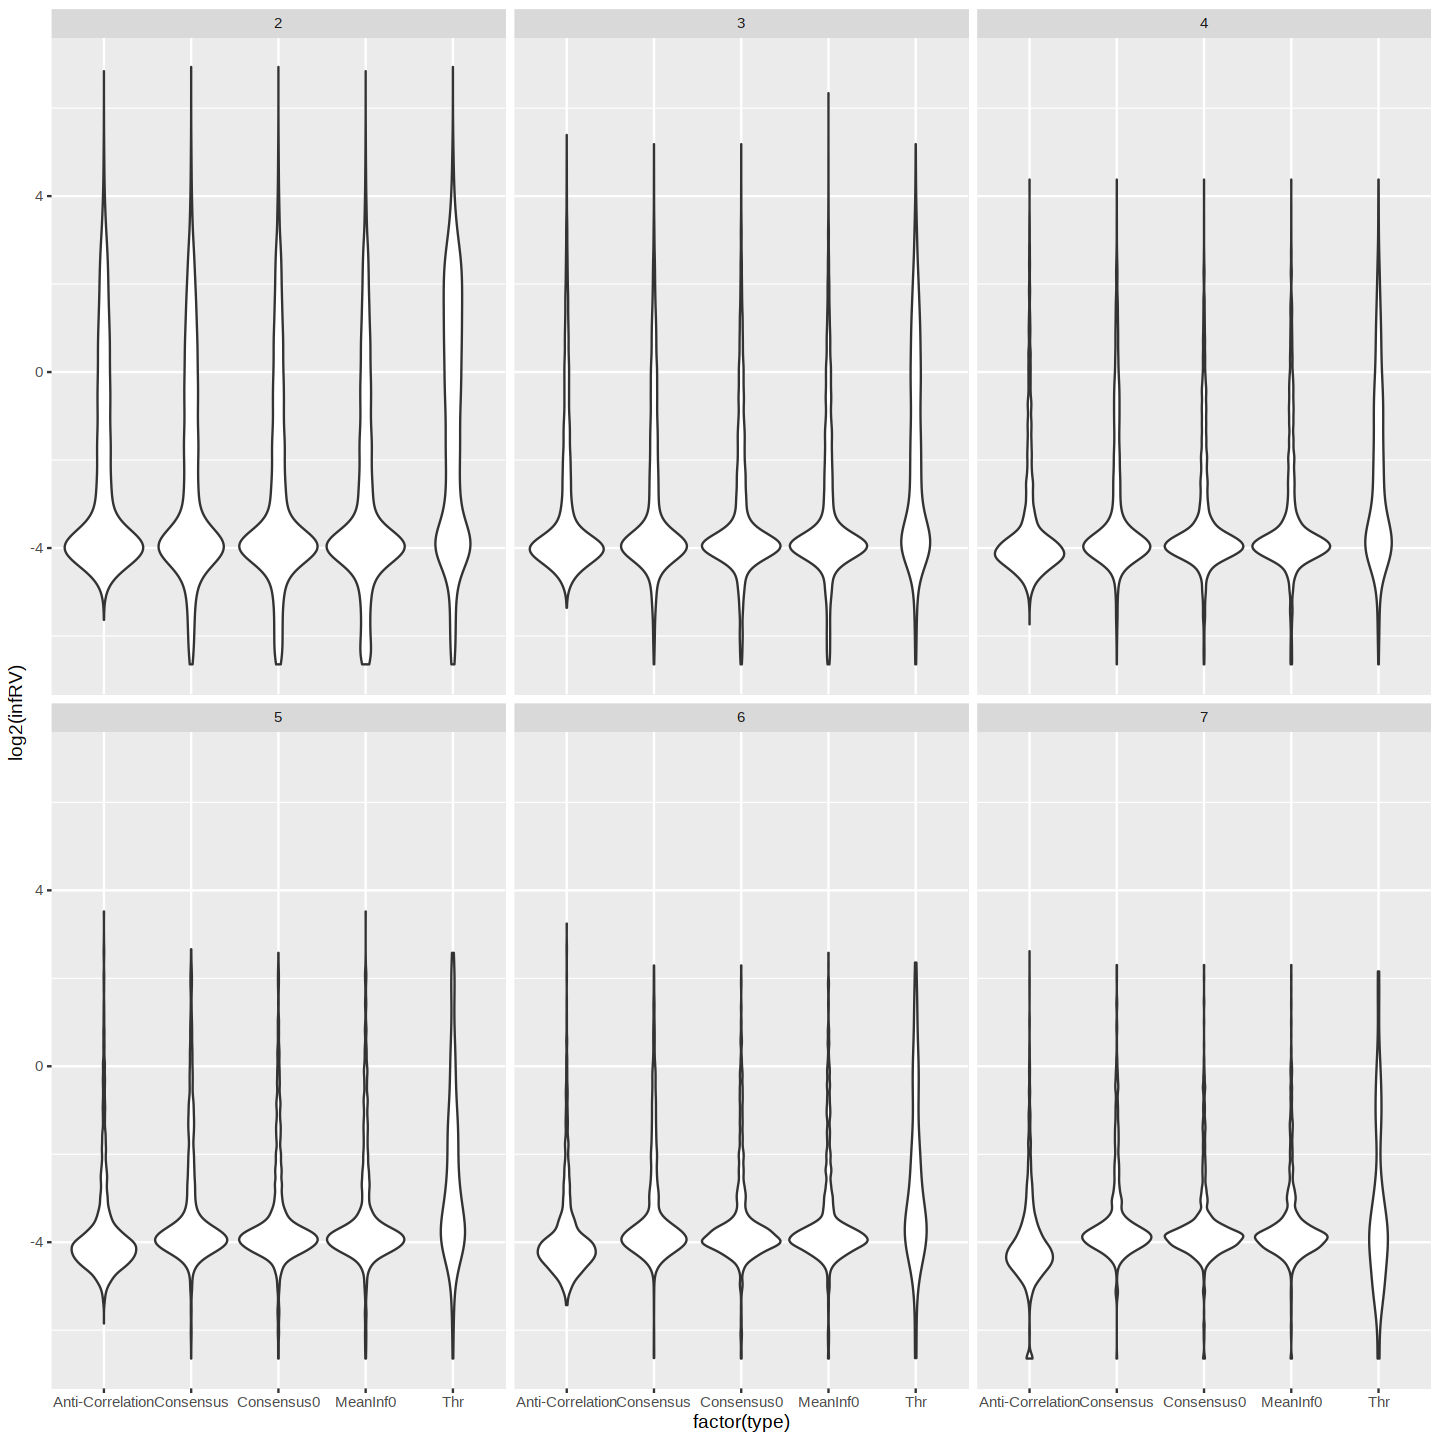

In [8]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [9]:
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="infRV", fun.aggregate = median)

,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.09206567,0.06972192,0.06309300,0.05949578,0.05723929,0.05425543
2,Consensus,0.09052071,0.07303777,0.07101864,0.07129516,0.07171674,0.07146176
3,Consensus0,0.07602783,0.07089800,0.06995842,0.06944014,0.06859142,0.06886636
4,MeanInf0,0.07414942,0.07046575,0.06951166,0.06983177,0.06904327,0.06896203
5,Thr,0.37084341,0.17264547,0.11990263,0.11739470,0.09445083,0.07287353


#### Reduction in infRV

In [12]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus")
save(dfRedInf, file = file.path(save_dir, "dfRedInf.RData"))

In [13]:
### Consensus0
innNodes <- length(treeCons0$tip)+1:treeCons0$Nnode
childNodes <- Descendants(treeCons0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons0$tip)), redInfRV), type="Consensus0"))
save(dfRedInf, file = file.path(save_dir, "dfRedInf.RData"))

In [14]:
### Anti-Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))
save(dfRedInf, file = file.path(save_dir, "dfRedInf.RData"))

In [15]:
### MeanInf
innNodes <- length(treeMeanInf0$tip)+1:treeMeanInf0$Nnode
childNodes <- Descendants(treeMeanInf0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMeanInf0$tip)), redInfRV), type="MeanInf0"))
save(dfRedInf, file = file.path(save_dir, "dfRedInf.RData"))

In [16]:
### Thr
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMeanInf0$tip)), redInfRV), type="Cons_Thr"))
save(dfRedInf, file = file.path(save_dir, "dfRedInf.RData"))

In [17]:
dfInfRV <- cbind(dfInfRV, redInfRV = dfRedInf$red)
save(dfRedInf, file = file.path(save_dir, "dfRedInf.RData"))

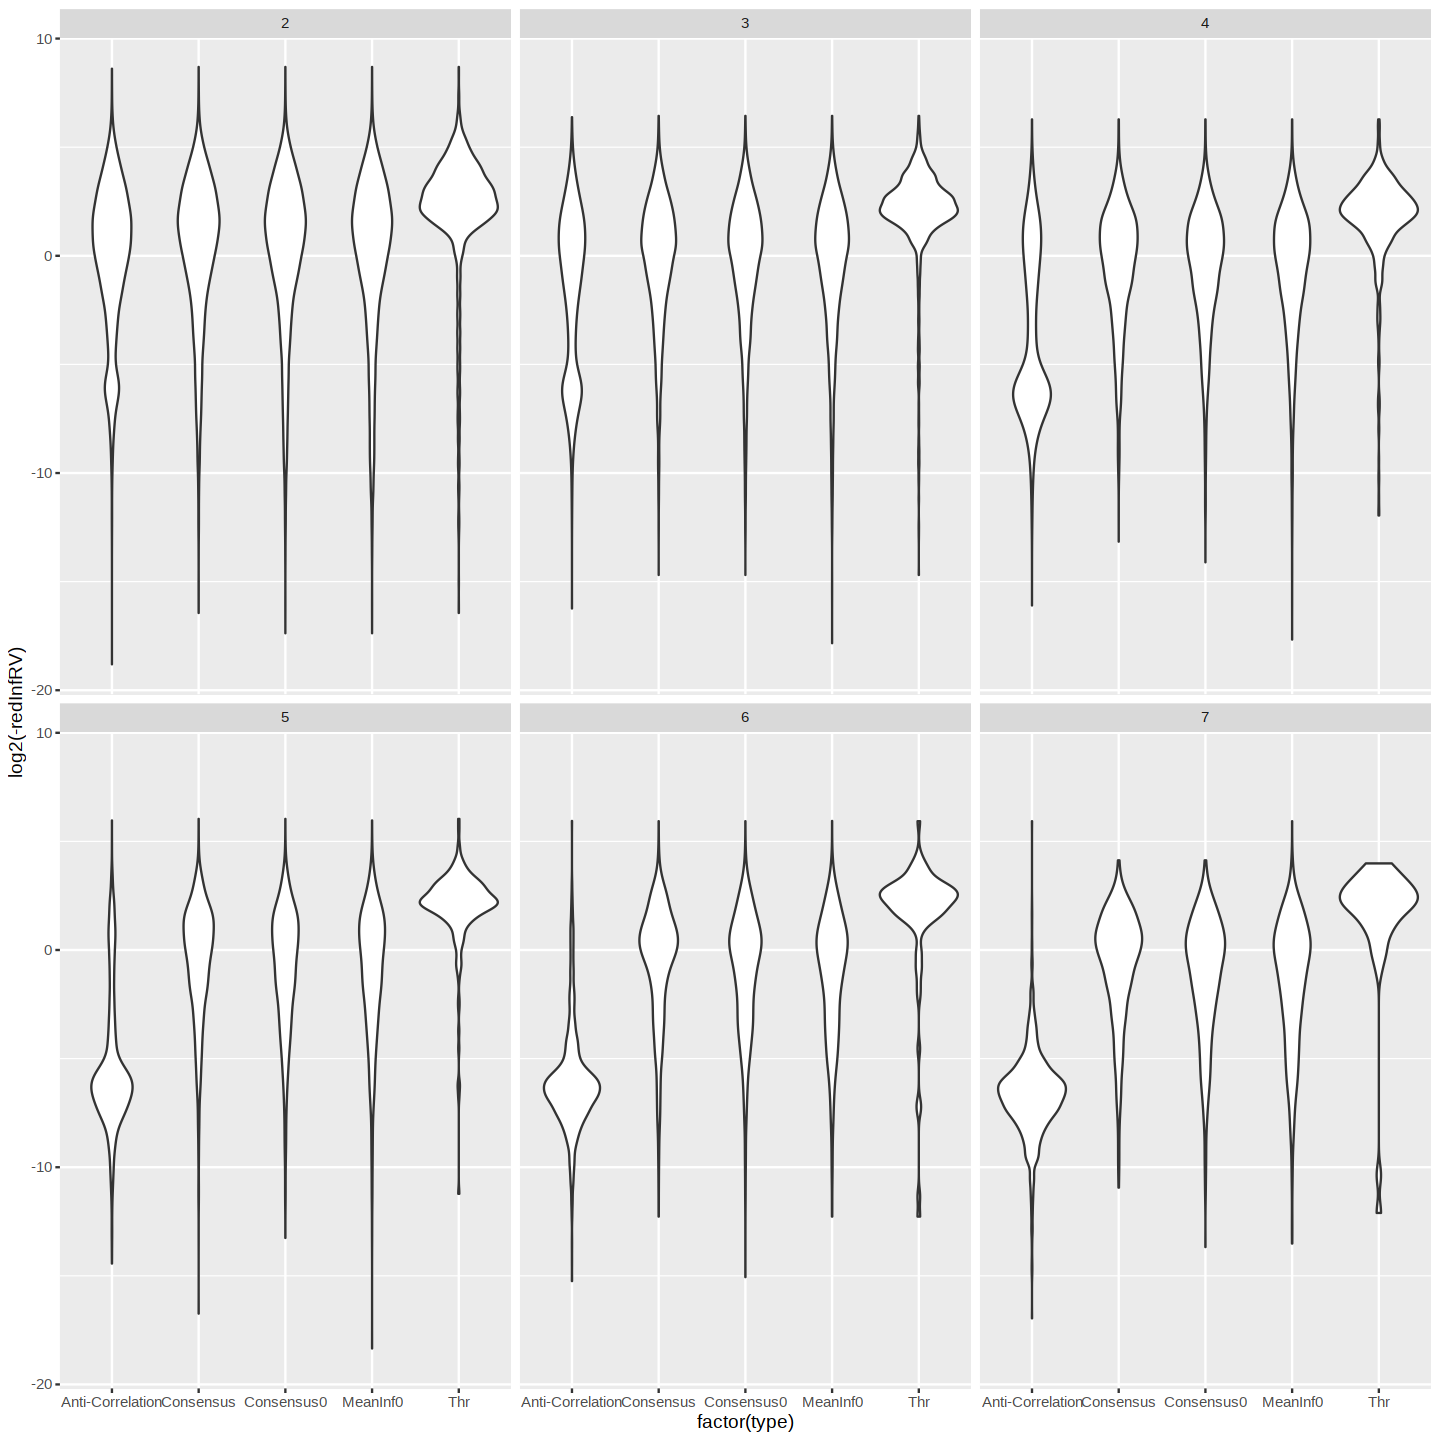

In [18]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [19]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,13033,7537,4168,2398,1380,1946
2,Consensus,11380,6129,3082,1494,718,676
3,Consensus0,11682,6334,3319,1761,930,971
4,MeanInf0,11893,6406,3369,1792,963,1115
5,Thr,5781,1978,729,233,80,42


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-1.396505,-0.5864169,-0.02641106,-0.01432658,-0.01209714,-0.01003046
2,Consensus,-1.877118,-1.2184135,-0.99258212,-0.98719333,-1.01667457,-0.94251887
3,Consensus0,-1.774103,-1.1650774,-0.91377217,-0.74749023,-0.75658195,-0.64093341
4,MeanInf0,-1.704625,-1.1374325,-0.88298780,-0.71679581,-0.65740016,-0.54067828
5,Thr,-6.036523,-4.8466084,-4.23954015,-4.72911881,-5.27330827,-4.83464603


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-391.6635,-83.39751,-77.702,-62.47076,-61.45779,-60.99260
2,Consensus,-414.2164,-86.89420,-77.702,-65.63566,-60.99260,-17.48415
3,Consensus0,-414.2164,-86.89420,-77.702,-65.63566,-60.99260,-17.48415
4,MeanInf0,-414.2164,-86.89420,-77.702,-62.47076,-61.45779,-60.99260
5,Thr,-414.2164,-86.89420,-77.702,-65.63566,-60.99260,-15.85133


In [23]:
load("environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis/genesCons0.RData")
load("environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis/genesCons.RData")
load("environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis/genesCor.RData")
load("environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis/genesMeanInf0.RData")
load("environment/Chimp/mode=gcbias/post_type=gibbs_nrep=100_tf=100/tree_analysis/genesThr.RData")

In [24]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "depth")
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus", nGenes = sapply(genesCons[2:length(genesCons)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus0", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Anti-Correlation", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="MeanInf0", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Threshold", nGenes = sapply(genesThr[2:length(genesThr)], length), 
                                       depth = node.depth(treeThr,2)[length(treeThr$tip)+2:treeThr$Nnode]))

dfNGenes[dfNGenes$depth > 6,"depth"]=7

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 304



    1     2     3     4     5     6     7     8     9    10    11    12    13 
15785  7453  2239  2618  1313   879   719   573   424   313   233   202   184 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  156   143   126   107    95    82    81    71    56    60    39    33    53 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   33    34    39    22    38    26    24    27    21    21    20    21    18 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   21    19    26    16    18     8     9    10    15    11     9     9    12 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
   12    11     4     7     6     5    10     7     5    11     8     7     5 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    5    11     7     6     8    10     2     4     2     2     3     7     4 
   79    80    81    82    83    85    86    87    

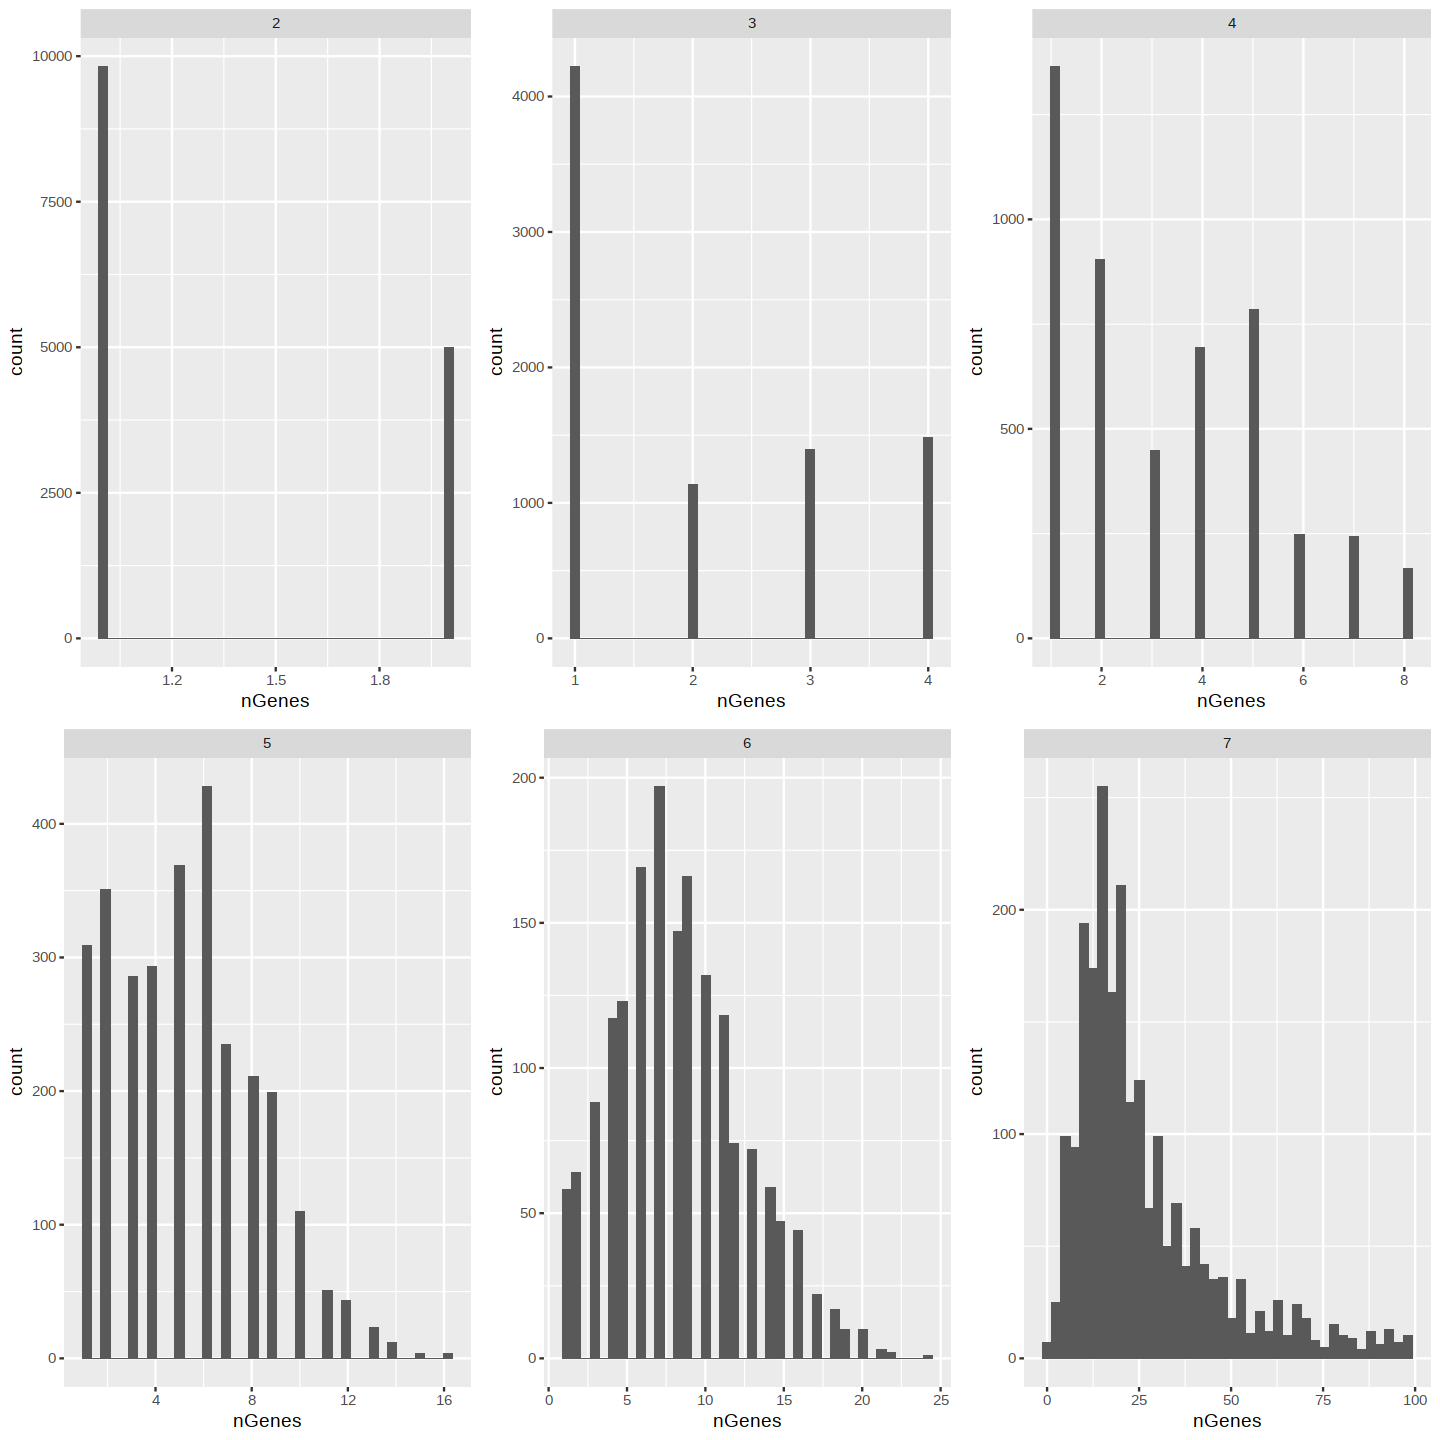

In [22]:
#### Anti-Correlation
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCor,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
23238  2903   251    62    14    12     5     3     2     1     2     1     2 
   14 19720 
    1     1 

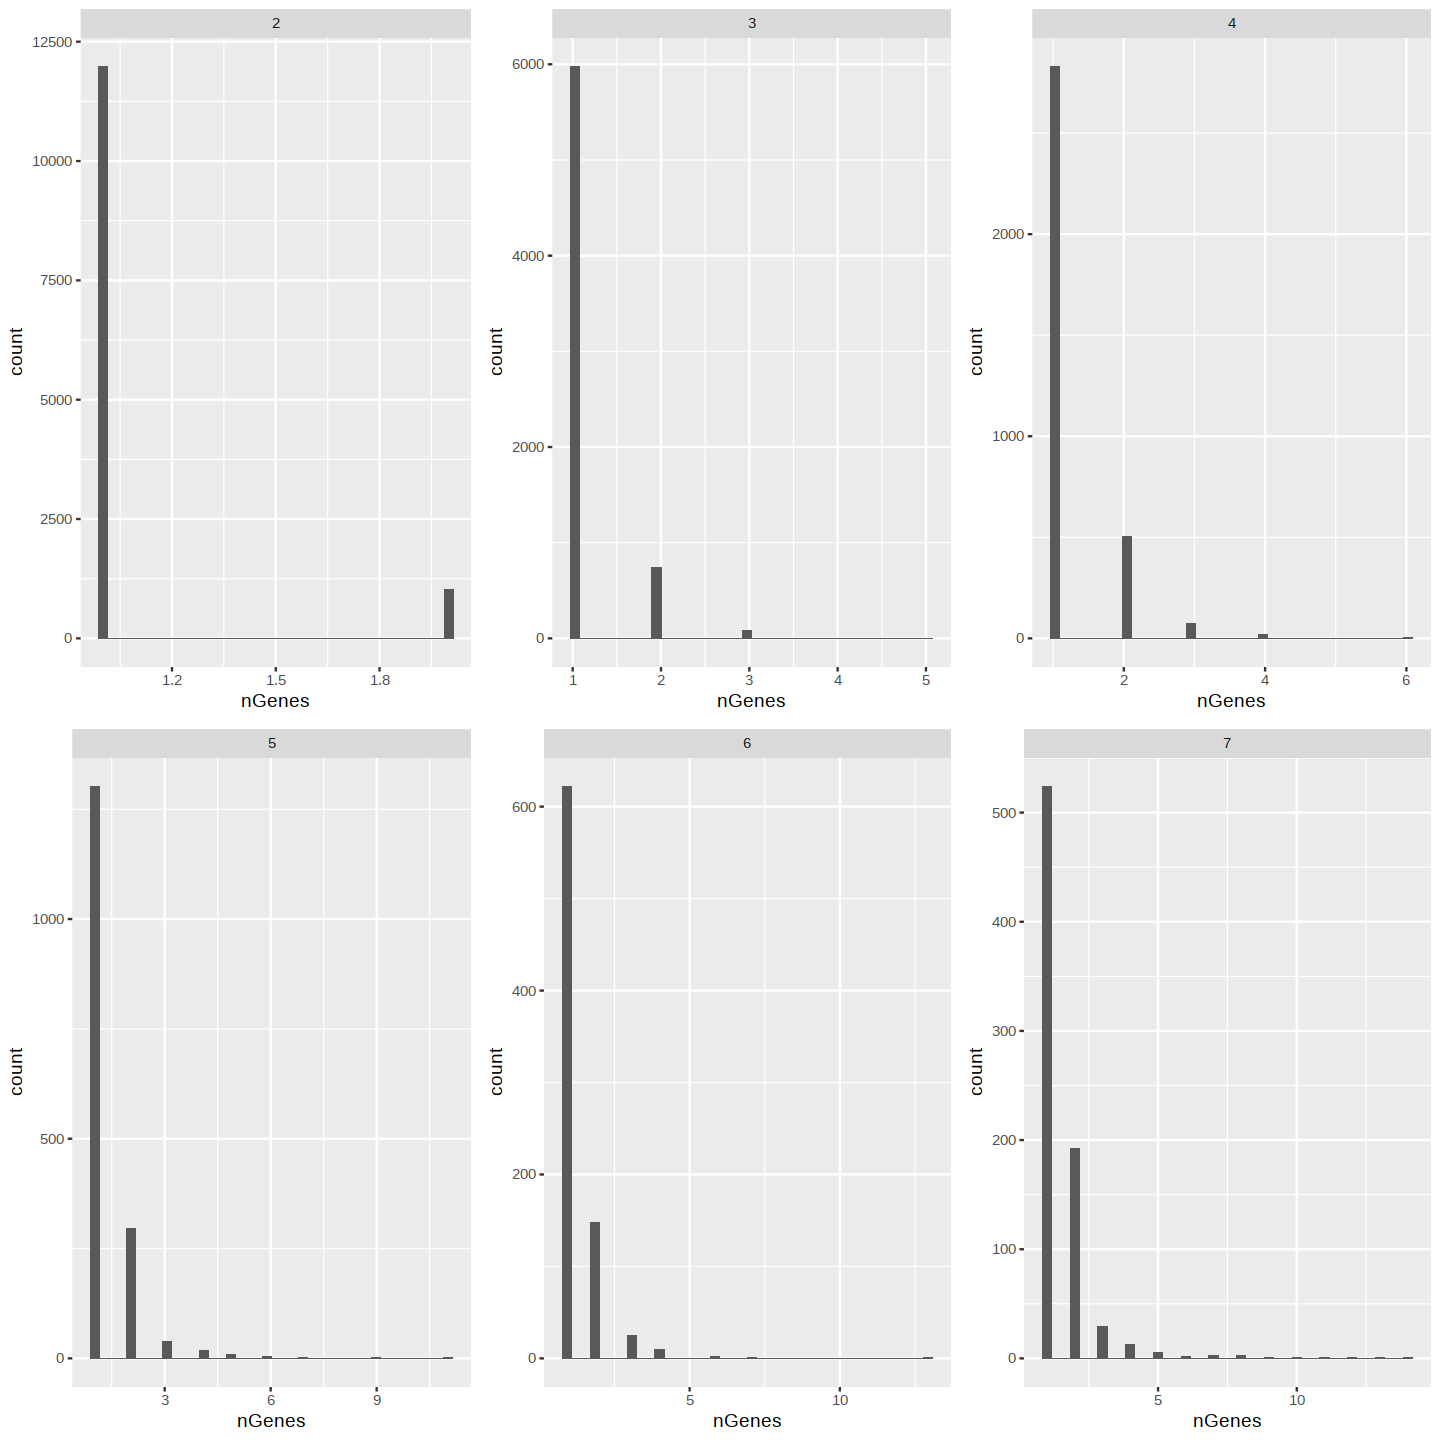

In [13]:
#### Consensus
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
23787  3432   419   124    47    25    15    11     6     1     1     3     2 
   14 19720 
    1     1 

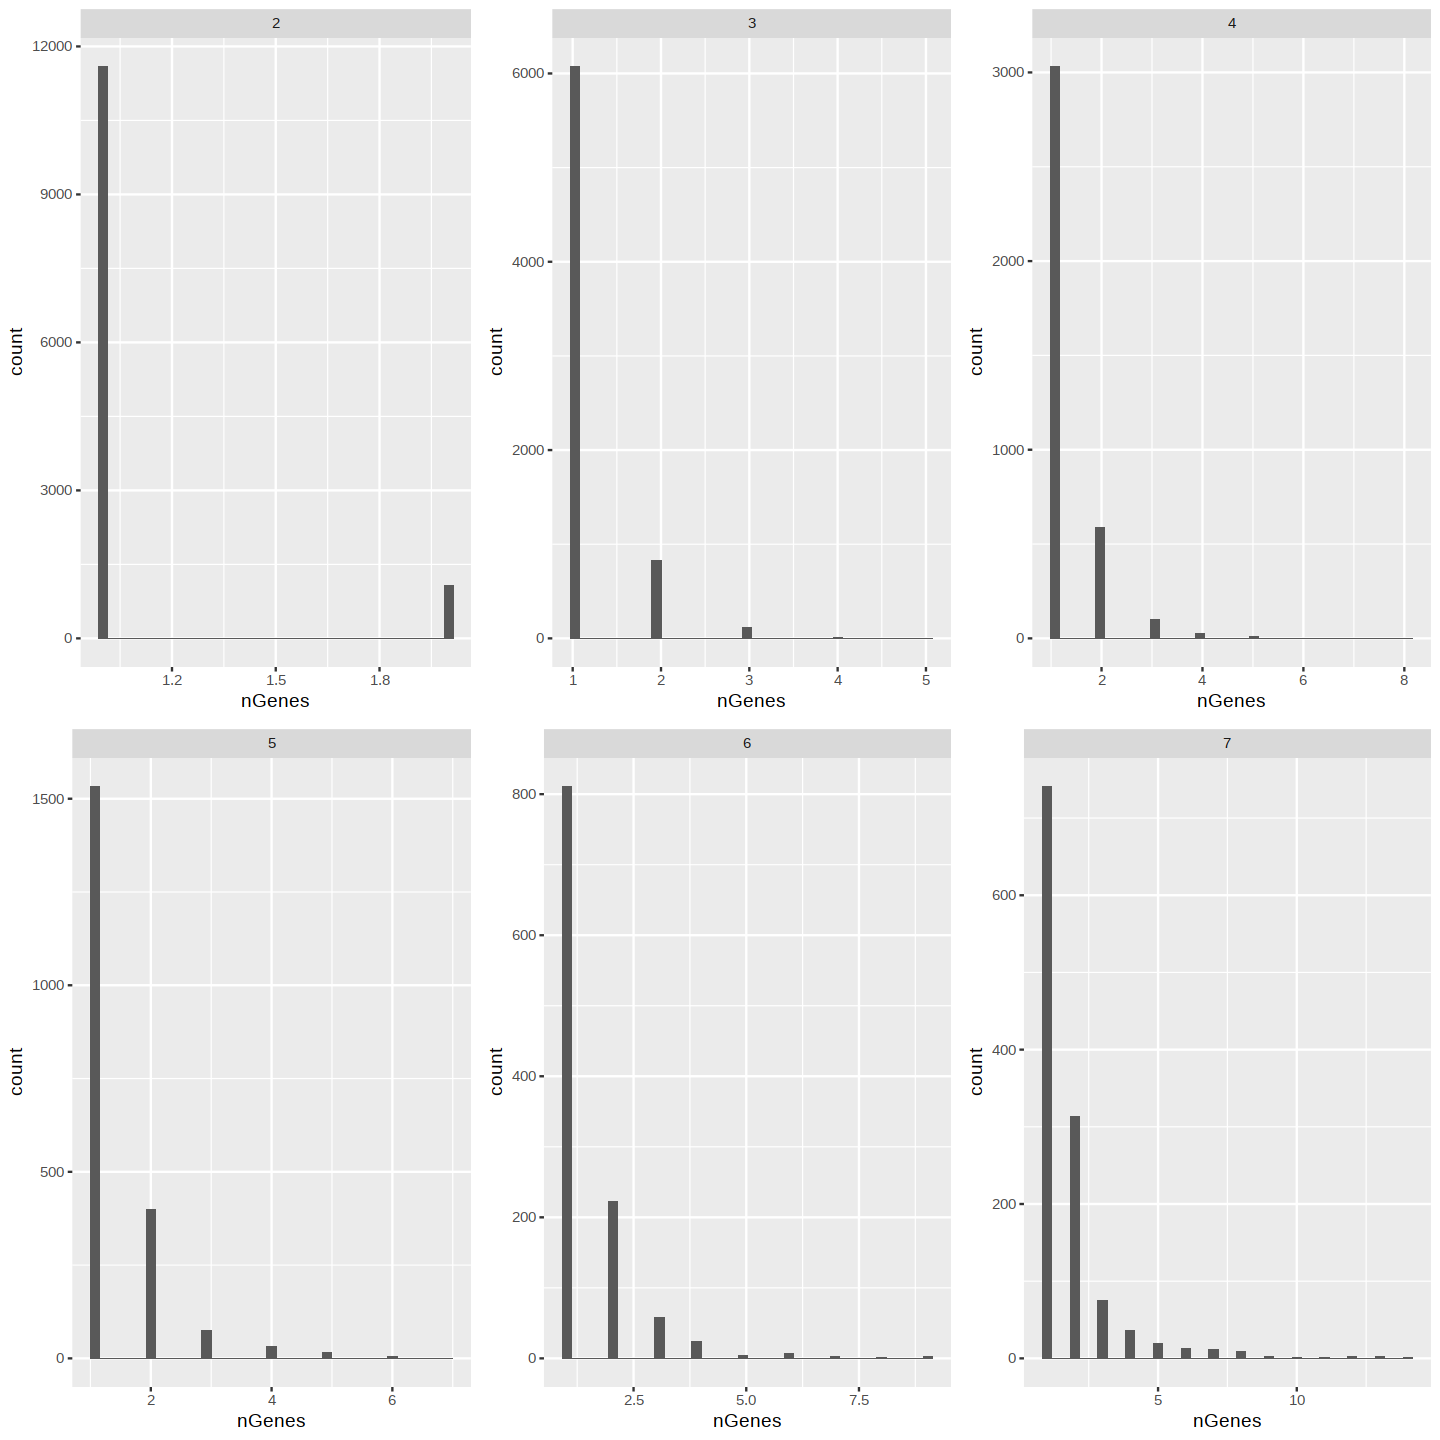

In [14]:
#### Consensus 0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesCons0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    11    12    13    14 
23934  3512   425   131    64    22    18    12     5     1     1     2     2 
19720 
    1 

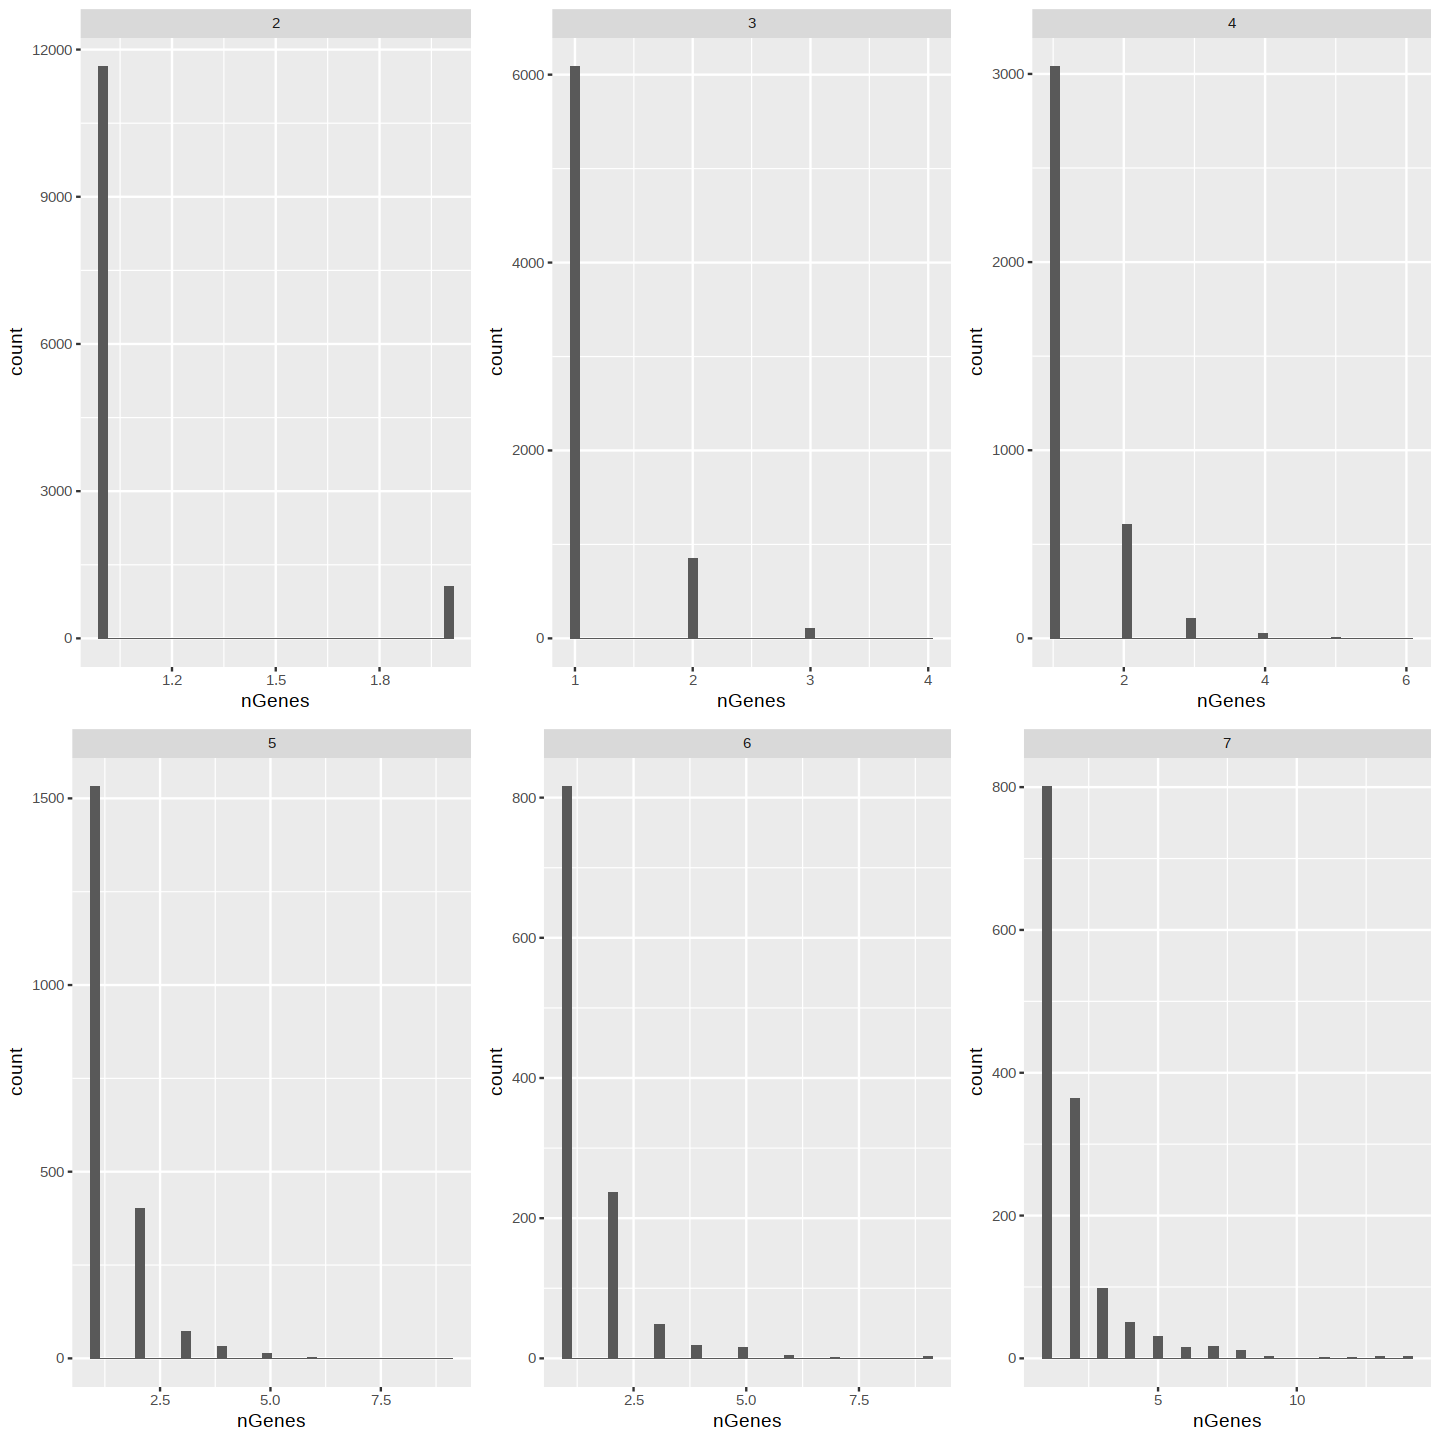

In [25]:
#### MeanInf0
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesMeanInf0,length))

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0



    1     2     3     4     5     6     7     8     9    10    11    12    13 
 8804   809    39     9     4     4     2     2     1     1     1     2     1 
   14 19720 
    1     1 

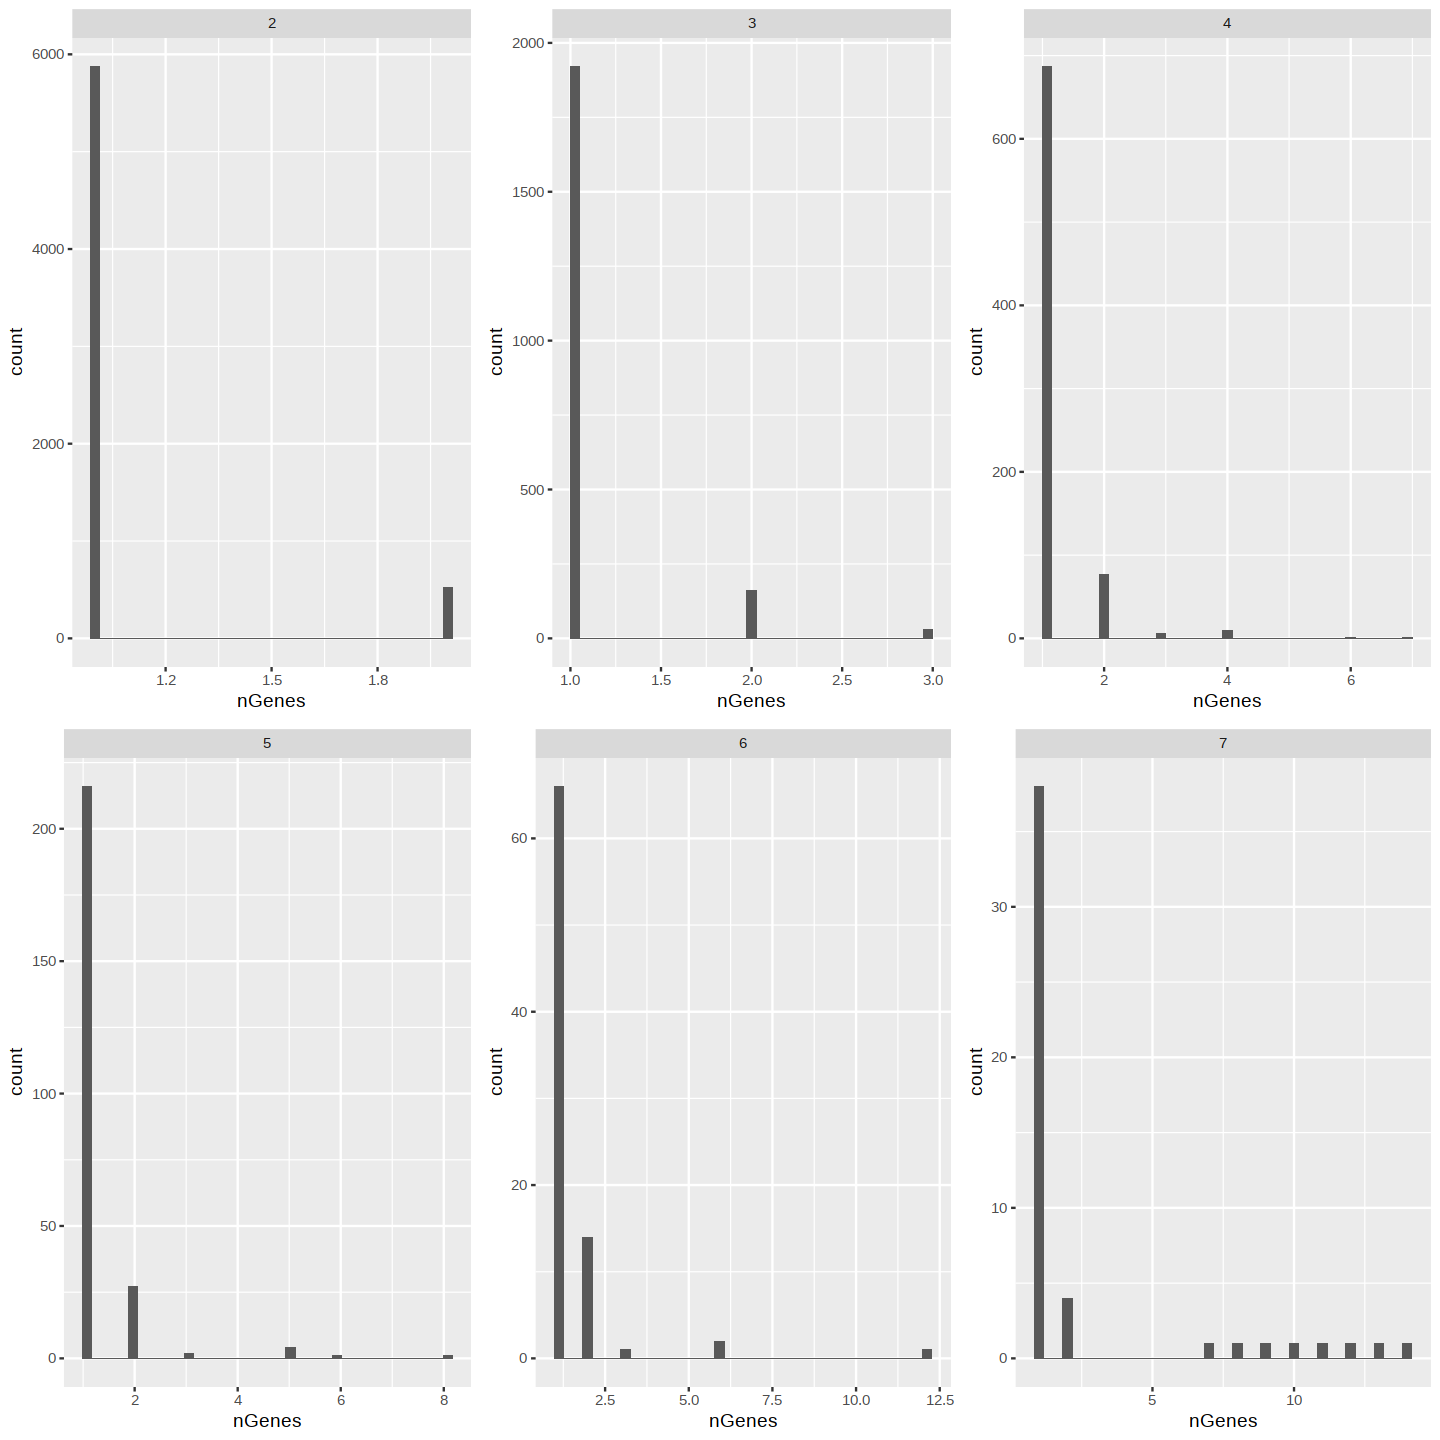

In [20]:
#### Thr
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Threshold" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Threshold" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)
table(sapply(genesThr,length))